<a href="https://colab.research.google.com/github/parisazeynaly/Breast-cancer-diagnosis/blob/main/breast_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# حذف پوشه موجود
!rm -rf Breast-cancer-diagnosis

In [2]:
!git clone https://github.com/parisazeynaly/Breast-cancer-diagnosis.git


Cloning into 'Breast-cancer-diagnosis'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 349.07 KiB | 17.45 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df['target'] = bc.target
df['target_name'] = df['target'].map({0: 'malignant', 1: 'benign'})

In [5]:
print(bc.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Dataset Info

In [6]:
bc.target[450]

np.int64(1)

In [7]:
bc.target.shape

(569,)

In [8]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
bc.data.shape

(569, 30)

In [10]:
features_to_plot = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'target_name'
]

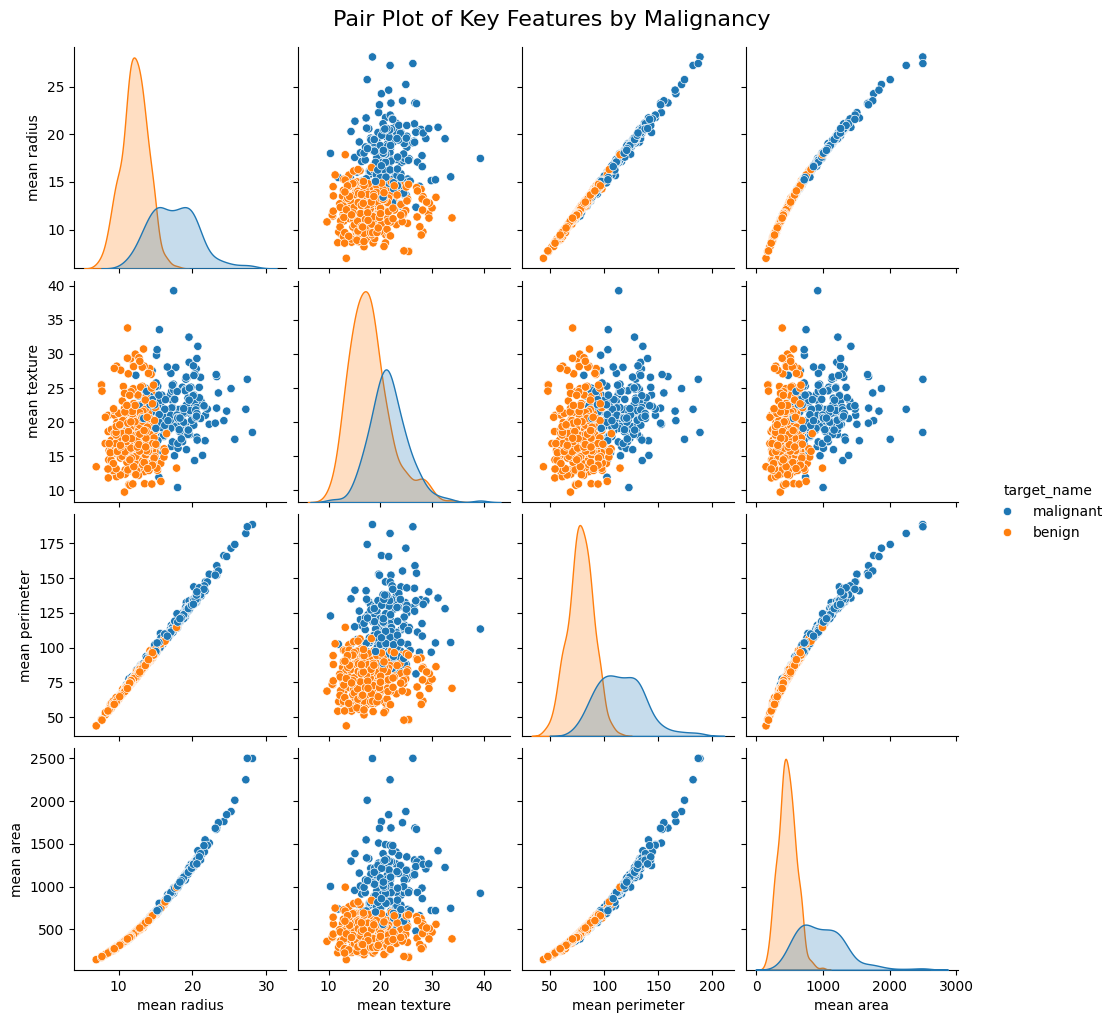

In [11]:
# Create the pair plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[features_to_plot], hue='target_name')
plt.suptitle('Pair Plot of Key Features by Malignancy', y=1.02, fontsize=16)
plt.show()

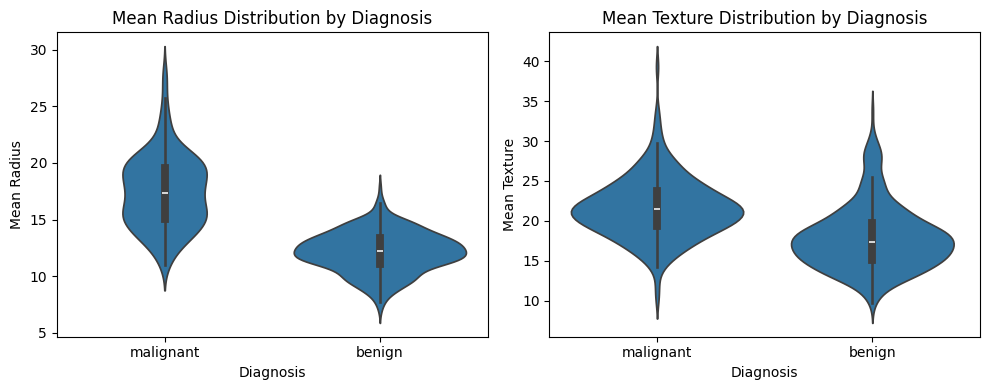

In [12]:
# Visualize distributions of key features by class
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x='target_name', y='mean radius', data=df)
plt.title('Mean Radius Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')

plt.subplot(1, 2, 2)
sns.violinplot(x='target_name', y='mean texture', data=df)
plt.title('Mean Texture Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')

plt.tight_layout()
plt.show()

**Preprocessing**

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a pipeline that first scales the data and then applies RandomForest
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the entire pipeline
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# --- Define the corrected metrics function ---
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):

    # Calculate training and testing accuracy
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    # Calculate precision, recall, and F1 score on the test set
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred_test)

    print(f'Accuracy (Train): {acc_train:.4f} - Accuracy (Test): {acc_test:.4f}')
    print(f'Precision: {p:.4f} - Recall: {r:.4f} - F1 Score: {f1:.4f}')

# --- Use the corrected function to evaluate the model ---
print("Random Forest Model Performance:")
calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

Random Forest Model Performance:
Accuracy (Train): 1.0000 - Accuracy (Test): 0.9737
Precision: 0.9848 - Recall: 0.9701 - F1 Score: 0.9774


In [16]:
!pip install shap

In [31]:
# import shap
# import matplotlib.pyplot as plt

# # Assuming you have already defined and trained your pipeline
# # We'll get the classifier and scaler from the pipeline
# classifier = pipeline.named_steps['classifier']
# scaler = pipeline.named_steps['scaler']

# # Get the scaled test data
# X_test_scaled = scaler.transform(X_test)

# # Create a SHAP TreeExplainer for the classifier
# # We pass the scaled test data to the explainer since the model was trained on scaled data
# explainer = shap.TreeExplainer(classifier)
# shap_values = explainer.shap_values(X_test_scaled)

# # --- Plotting the results ---

# # Overall Feature Importance (Summary Plot)
# # We pass the SHAP values for the benign class (index 1) and the corresponding
# # scaled data, ensuring the shapes match.
# shap.summary_plot(shap_values[1], X_test_scaled, feature_names=bc.feature_names)
# plt.title('SHAP Feature Importance')
# plt.tight_layout()
# plt.show()

# # Individual Prediction Explanation (Force Plot)
# # To plot for the first instance in the test set (index 0), you need to select
# # the SHAP values for that specific instance from the correct class array (index 1),
# # and use the scaled data for that instance.
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_scaled[0], feature_names=bc.feature_names)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

Classification

In [ ]:
from re import A
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
def calculate_metrics(y_test,y_train,y_pred_train, y_pred_test):
    acc_train=accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p=precision_score(y_true=y_test, y_pred=y_pred_test)
    r=recall_score(y_true=y_test, y_pred=y_pred_test)
    print(f'acc_train:{acc_train} - acc_test:{acc_test}')
    print(f'precision:{p} - recall:{r}')




In [ ]:
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,y_train)


In [ ]:
y_pred_train = Gnb.predict(X_train)
y_pred_test =Gnb.predict(X_test)

acc_train=accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test=accuracy_score(y_true=y_test, y_pred=y_pred_test)
# acc_train, acc_test, p, r =calculate_metrics(y_train,y_test,y_pred_train, y_pred_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test =knn.predict(X_test)

acc_train=accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test=accuracy_score(y_true=y_test, y_pred=y_pred_test)

Desion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=100,min_samples_split=5,criterion='entropy')
dtc.fit(X_train,y_train)

In [ ]:
y_pred_train = dtc.predict(X_train)
y_pred_test =dtc.predict(X_test)

acc_train=accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test=accuracy_score(y_true=y_test, y_pred=y_pred_test)

In [ ]:
# Reinstall shap and its dependencies to resolve compatibility issues
!pip install --upgrade shap

In [ ]:
# Install a specific compatible version of numba
!pip install numba==0.56.4